## K-Means Clustering

In [2]:
# Library
import numpy as np
import matplotlib.pyplot as plt

# Hàm K-means dùng cho 3 assignments
def kmeans_init_centroids(X, k):
    idx = np.random.choice(X.shape[0], k, replace=False)
    return X[idx]

def kmeans_assign_labels(X, centroids):
    dists = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(dists, axis=1)

def kmeans_update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points = X[labels == i]
        if len(points) > 0:
            centroids[i] = points.mean(axis=0)
        else:
            centroids[i] = X[np.random.choice(X.shape[0])]
    return centroids

def has_converged(old_centroids, centroids):
    return np.allclose(old_centroids, centroids)

def kmeans(X, k, max_iters=100):
    centroids = kmeans_init_centroids(X, k)
    for _ in range(max_iters):
        old_centroids = centroids.copy()
        labels = kmeans_assign_labels(X, centroids)
        centroids = kmeans_update_centroids(X, labels, k)
        if has_converged(old_centroids, centroids):
            break
    return centroids, labels

def print_centroids(centroids):
    print("Các centroid được tìm thấy:")
    for i, centroid in enumerate(centroids):
        print(f"Centroid {i+1}: {centroid}")

### Assignment 1 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

Các centroid được tìm thấy:
Centroid 1: [2.00977268 1.97387946]
Centroid 2: [2.94030031 6.04919913]
Centroid 3: [7.98642782 2.93618727]


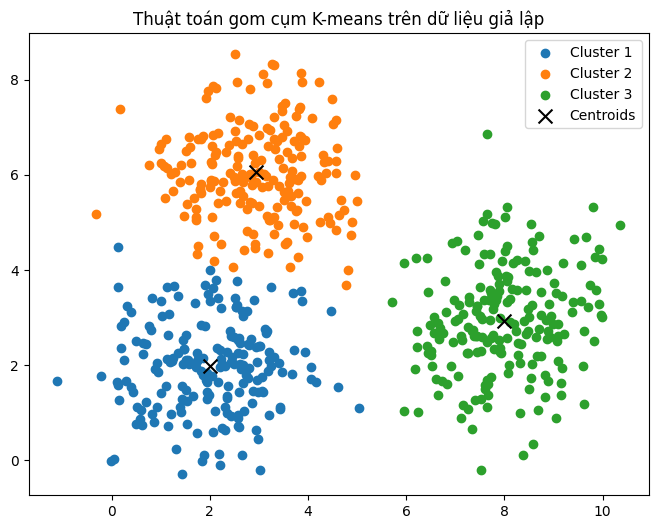

In [3]:
# 1. Sinh dữ liệu giả lập
np.random.seed(18)
mean = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]  # Ma trận hiệp phương sai

X1 = np.random.multivariate_normal(mean[0], cov, 200)
X2 = np.random.multivariate_normal(mean[1], cov, 200)
X3 = np.random.multivariate_normal(mean[2], cov, 200)
X = np.concatenate((X1, X2, X3), axis=0)

# 2. Huấn luyện K-means
k = 3
centroids, labels = kmeans(X, k)

# In ra các centroid
print_centroids(centroids)

# 3. Vẽ kết quả
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.title('Thuật toán gom cụm K-means trên dữ liệu giả lập')
plt.legend()
plt.show()

Nhận xét về khởi tạo ngẫu nhiên centroid: Việc khởi tạo centroid ngẫu nhiên có thể dẫn đến các kết quả khác nhau, đôi khi thuật toán hội tụ về các cụm không tối ưu. Để giảm ảnh hưởng này, có thể chạy K-means nhiều lần với các khởi tạo khác nhau và chọn kết quả tốt nhất.

### Assignment 2 (2 scores):
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

Các centroid được tìm thấy:
Centroid 1: [2.54898293 3.51477327]
Centroid 2: [2.44885139 6.37118916]
Centroid 3: [4.3094684  5.71628061]


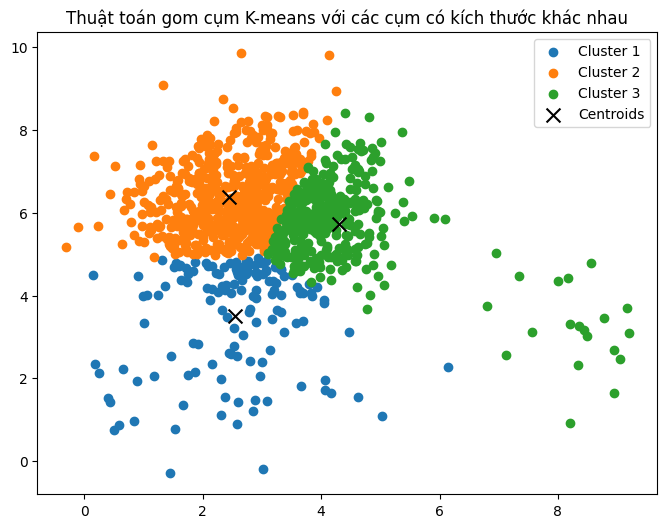

In [4]:
# 1. Sinh dữ liệu giả lập với số lượng điểm khác nhau cho từng cụm
np.random.seed(18)
mean = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]  # Ma trận hiệp phương sai

X1 = np.random.multivariate_normal(mean[0], cov, 50)
X2 = np.random.multivariate_normal(mean[1], cov, 20)
X3 = np.random.multivariate_normal(mean[2], cov, 1000)
X = np.concatenate((X1, X2, X3), axis=0)

# 2. Huấn luyện K-means
k = 3
centroids, labels = kmeans(X, k)

# In centroid
print_centroids(centroids)

# 3. Vẽ kết quả
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.title('Thuật toán gom cụm K-means với các cụm có kích thước khác nhau')
plt.legend()
plt.show()

Nhận xét về ảnh hưởng của kích thước cụm: Khi các cụm có kích thước rất khác nhau, K-means có xu hướng bị lệch về phía cụm lớn hơn. Các centroid có thể không nằm chính xác ở trung tâm của các cụm nhỏ, dẫn đến việc phân cụm không chính xác cho các cụm nhỏ hoặc bị 'nuốt' bởi cụm lớn.

### Assignment 3 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where 

$$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 

and

$$
\Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

Các centroid được tìm thấy:
Centroid 1: [2.02761793 1.98383845]
Centroid 2: [1.20836262 6.1327177 ]
Centroid 3: [7.647551   3.61448026]


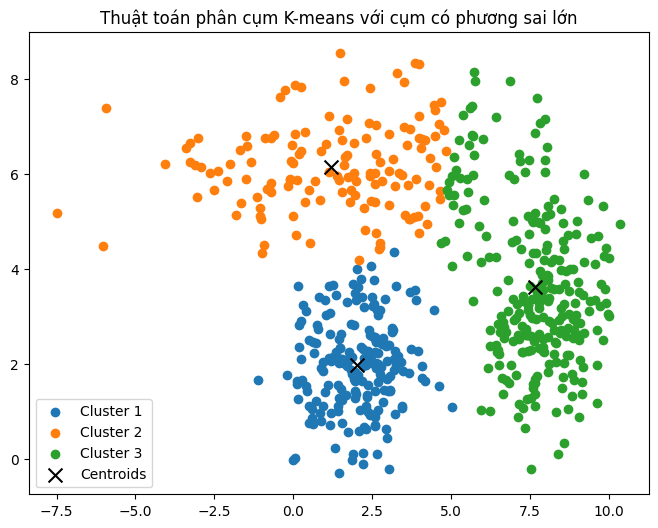

In [5]:
# 1. Sinh dữ liệu giả lập với các ma trận hiệp phương sai khác nhau
np.random.seed(18)
mean = [[2, 2], [8, 3], [3, 6]]
cov1 = [[1, 0], [0, 1]]      # Sigma_1
cov2 = [[10, 0], [0, 1]]     # Sigma_2

X1 = np.random.multivariate_normal(mean[0], cov1, 200)
X2 = np.random.multivariate_normal(mean[1], cov1, 200)
X3 = np.random.multivariate_normal(mean[2], cov2, 200)
X = np.concatenate((X1, X2, X3), axis=0)

# 2. Huấn luyện K-means
k = 3
centroids, labels = kmeans(X, k)

# In centrroids
print_centroids(centroids)

# 4. Vẽ kết quả
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.title('Thuật toán phân cụm K-means với cụm có phương sai lớn')
plt.legend()
plt.show()

Nhận xét về ảnh hưởng của phân phối có phương sai lớn: Khi một cụm có phương sai lớn (Sigma_2), các điểm dữ liệu của cụm này bị trải rộng ra, làm cho K-means khó xác định ranh giới giữa các cụm. Centroid của cụm này có thể bị lệch, và một số điểm của cụm này có thể bị gán nhãn sai sang các cụm khác. Điều này làm giảm hiệu quả phân cụm của K-means.